In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import os 
# cwd = os.getcwd()
# parent_dir = os.path.join(cwd,os.pardir)
# file_path = os.path.join(parent_dir,"titanic.csv")

In [3]:
df = pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
235,0,3,female,NaN,0,0,7.5500,S
55,1,1,male,NaN,0,0,35.5000,S
601,0,3,male,NaN,0,0,7.8958,S
818,0,3,male,43.0,0,0,6.4500,S
420,0,3,male,NaN,0,0,7.8958,C


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
426,1,2,female,28.000000,1,0,26.0000,S
47,1,3,female,29.699118,0,0,7.7500,Q
42,0,3,male,29.699118,0,0,7.8958,C
423,0,3,female,28.000000,1,1,14.4000,S
710,1,1,female,24.000000,0,0,49.5042,C


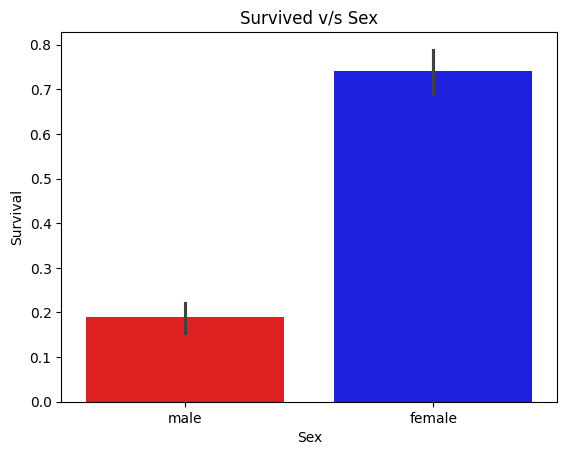

In [15]:
sns.barplot(x='Sex', y='Survived', data=df , palette=['r','b'])
plt.title("Survived v/s Sex")
plt.xlabel('Sex')
plt.ylabel('Survival')
plt.show()

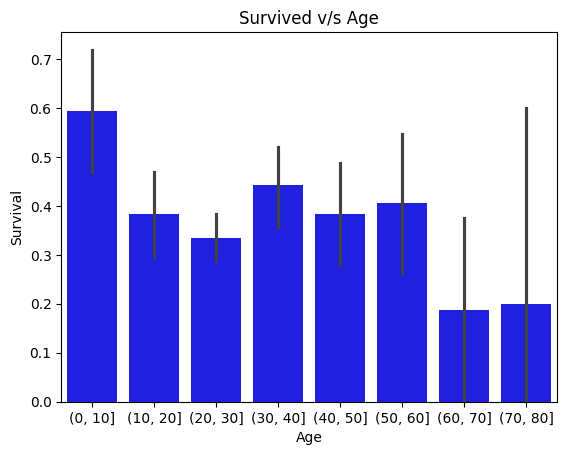

In [16]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
sns.barplot(x=pd.cut(df['Age'],bins=age_bins), y='Survived', data=df , color='b')
plt.title("Survived v/s Age")
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

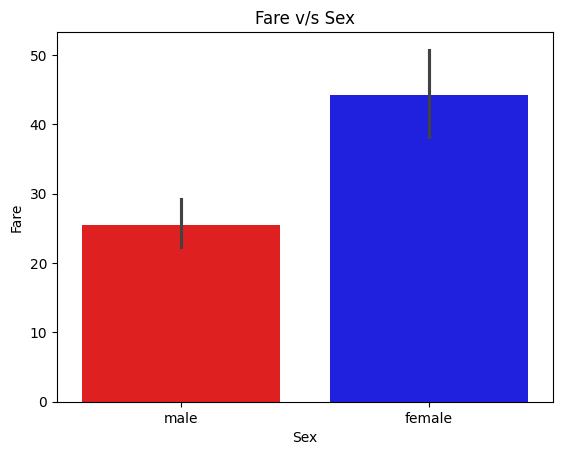

In [17]:
sns.barplot(x='Sex', y='Fare', data=df,palette=['r','b'])
plt.title("Fare v/s Sex")
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

In [18]:
df[['Sex',"Fare"]].sample(10)

,Sex,Fare
826,male,56.4958
169,male,56.4958
245,male,90.0000
196,male,7.7500
109,female,24.1500
268,female,153.4625
547,male,13.8625
540,female,71.0000
70,male,10.5000
97,male,63.3583


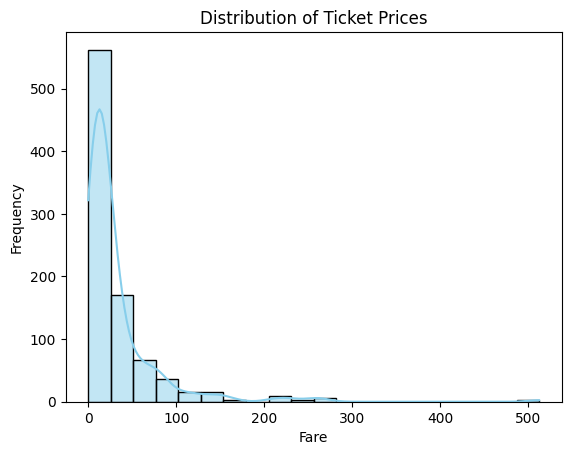

In [19]:

sns.histplot(data=df, x='Fare', bins=20, color='skyblue', kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [20]:
df['Fare'].value_counts().head(15)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
7.2292     15
26.5500    15
0.0000     15
7.8542     13
8.6625     13
7.2500     13
7.2250     12
Name: count, dtype: int64